<a href="https://colab.research.google.com/github/MLeon8/NPM_Modeling/blob/main/CascadaMetastasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cascada metastásica

Para aproximarse a una simulación completa de la cascada metastásica, se puede construir una serie de modelos integrados que representen cada etapa y sus interacciones. A continuacion , se muestra un desglose de cada etapa junto con un código más detallado que captura aspectos de cada fase.

*Tener en cuenta que estos modelos son aproximaciones y su integración podría requerir un enfoque de simulación multiagente o híbrido más avanzado.

## 1. Invasión Tumoral (Modelo basado en Reacción-Difusión)
La invasión tumoral puede modelarse como un proceso de difusión asistido por la degradación de la matriz extracelular mediante enzimas (como las metaloproteinasas). Un modelo de reacción-difusión captura cómo las células cancerosas se propagan al descomponer y moverse a través del tejido.

## Ecuaciones del Modelo

1. **Difusión de Células Tumorales y Enzimas**
   
   La ecuación de difusión en dos dimensiones para la concentración \( C \) de células tumorales o enzimas en la posición \((i, j)\) es:
   
   \[   C_{i,j}^{\text{new}} = C_{i,j}^{\text{old}} + D \cdot \left( C_{i+1,j} + C_{i-1,j} + C_{i,j+1} + C_{i,j-1} - 4 \cdot C_{i,j} \right) \\\]
   
   donde \( D \) es la tasa de difusión específica para células tumorales o enzimas.

2. **Producción de Enzimas**
   
   Las células tumorales producen enzimas que ayudan a degradar la matriz extracelular. Este término se expresa como:
   
   \[
   \text{enzimas}_{i,j} += 0.1 \times \text{células\_tumorales}_{i,j}
   \]

3. **Degradación de la Matriz Extracelular**
   
   La matriz extracelular se degrada en función de la concentración de enzimas:
   
   \[
   \text{matriz\_extracelular}_{i,j} -= \text{tasa\_degradación} \times \text{enzimas}_{i,j} \times \text{matriz\_extracelular}_{i,j}
   \]

4. **Migración de Células Tumorales**
   
   Las células tumorales migran hacia áreas con menor concentración de matriz extracelular:
   
   \[
   \text{células\_tumorales}_{i,j} += 0.01 \times (1 - \text{matriz\_extracelular}_{i,j}) \times \text{células\_tumorales}_{i,j}
   \]
'''))
\



## Ecuaciones del Modelo

### Difusión de Células Tumorales y Enzimas
La ecuación de difusión en dos dimensiones para la concentración \(C\) de células tumorales o enzimas en la posición \((i,j)\) es:

\[
C_{i,j}^{\text{new}} = C_{i,j}^{\text{old}} + D \cdot \left( C_{i+1,j} + C_{i-1,j} + C_{i,j+1} + C_{i,j-1} - 4 \cdot C_{i,j} \right)
\]

donde \( D \) es la tasa de difusión específica para células tumorales o enzimas.

### Producción de Enzimas
Las células tumorales producen enzimas que ayudan a degradar la matriz extracelular. Este término se expresa como:

\[
\text{enzimas}_{i,j} += 0.1 \times \text{células\_tumorales}_{i,j}
\]

### Degradación de la Matriz Extracelular
La matriz extracelular se degrada en función de la concentración de enzimas:

\[
\text{matriz\_extracelular}_{i,j} -= \text{tasa\_degradación} \times \text{enzimas}_{i,j} \times \text{matriz\_extracelular}_{i,j}
\]

### Migración de Células Tumorales
Las células tumorales migran hacia áreas con menor concentración de matriz extracelular:

\[
\text{células\_tumorales}_{i,j} += 0.01 \times (1 - \text{matriz\_extracelular}_{i,j}) \times \text{células\_tumorales}_{i,j}
\]


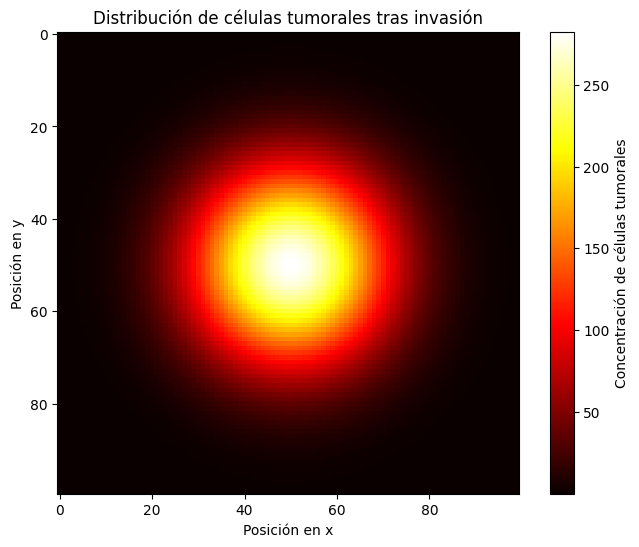

In [ ]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Definir las ecuaciones en LaTeX
display(Markdown(r'''

## Ecuaciones del Modelo

### Difusión de Células Tumorales y Enzimas
La ecuación de difusión en dos dimensiones para la concentración \(C\) de células tumorales o enzimas en la posición \((i,j)\) es:

\[
C_{i,j}^{\text{new}} = C_{i,j}^{\text{old}} + D \cdot \left( C_{i+1,j} + C_{i-1,j} + C_{i,j+1} + C_{i,j-1} - 4 \cdot C_{i,j} \right)
\]

donde \( D \) es la tasa de difusión específica para células tumorales o enzimas.

### Producción de Enzimas
Las células tumorales producen enzimas que ayudan a degradar la matriz extracelular. Este término se expresa como:

\[
\text{enzimas}_{i,j} += 0.1 \times \text{células\_tumorales}_{i,j}
\]

### Degradación de la Matriz Extracelular
La matriz extracelular se degrada en función de la concentración de enzimas:

\[
\text{matriz\_extracelular}_{i,j} -= \text{tasa\_degradación} \times \text{enzimas}_{i,j} \times \text{matriz\_extracelular}_{i,j}
\]

### Migración de Células Tumorales
Las células tumorales migran hacia áreas con menor concentración de matriz extracelular:

\[
\text{células\_tumorales}_{i,j} += 0.01 \times (1 - \text{matriz\_extracelular}_{i,j}) \times \text{células\_tumorales}_{i,j}
\]
'''))

# Parámetros del modelo
L = 100       # Tamaño de la red para evitar alta carga en Colab
D_tumor = 0.1  # Tasa de difusión de células tumorales
D_enzyme = 0.05 # Tasa de difusión de enzimas (MMPs)
degradation_rate = 0.02  # Tasa de degradación de la matriz extracelular
dt = 0.01      # Paso de tiempo
steps = 2000   # Número de pasos de simulación

# Inicializar concentraciones de tumor y enzima
tumor_cells = np.zeros((L, L))
tumor_cells[L//2, L//2] = 1  # Fuente de tumor en el centro
enzymes = np.zeros((L, L))
extracellular_matrix = np.ones((L, L))  # Matriz extracelular

# Simulación de invasión y degradación
for step in range(steps):
    # Difusión de células tumorales y enzimas
    tumor_cells += D_tumor * (np.roll(tumor_cells, 1, axis=0) + np.roll(tumor_cells, -1, axis=0) +
                              np.roll(tumor_cells, 1, axis=1) + np.roll(tumor_cells, -1, axis=1) - 4 * tumor_cells)
    enzymes += D_enzyme * (np.roll(enzymes, 1, axis=0) + np.roll(enzymes, -1, axis=0) +
                           np.roll(enzymes, 1, axis=1) + np.roll(enzymes, -1, axis=1) - 4 * enzymes)

    # Producción de enzimas por células tumorales
    enzymes += 0.1 * tumor_cells

    # Degradación de la matriz extracelular
    extracellular_matrix -= degradation_rate * enzymes * extracellular_matrix
    extracellular_matrix = np.clip(extracellular_matrix, 0, 1)  # Mantener valores entre 0 y 1

    # Migración de células tumorales donde la matriz está degradada
    tumor_cells += 0.01 * (1 - extracellular_matrix) * tumor_cells

# Visualización de la invasión
plt.figure(figsize=(8, 6))
plt.imshow(tumor_cells, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentración de células tumorales')
plt.title('Distribución de células tumorales tras invasión')
plt.xlabel('Posición en x')
plt.ylabel('Posición en y')
plt.show()


## 2. Intravasación (Modelo Agente-Basado)
En esta etapa, modelamos la intravasación usando un enfoque de agentes para representar la interacción de células tumorales con células endoteliales y macrófagos.

In [ ]:
import random

# Parámetros
num_tumor_cells = 500
num_macrophages = 200
grid_size = 100

# Inicializar posiciones de células tumorales y macrófagos
tumor_cells = [(random.randint(0, grid_size-1), random.randint(0, grid_size-1)) for _ in range(num_tumor_cells)]
macrophages = [(random.randint(0, grid_size-1), random.randint(0, grid_size-1)) for _ in range(num_macrophages)]
blood_vessel = (grid_size//2, grid_size//2)  # Localización de un vaso sanguíneo

# Función de intravasación
def intravasate(cell, blood_vessel, threshold=10):
    distance = np.sqrt((cell[0] - blood_vessel[0])**2 + (cell[1] - blood_vessel[1])**2)
    return distance < threshold

# Simulación de intravasación
intravasated_cells = []
for cell in tumor_cells:
    if intravasate(cell, blood_vessel):
        intravasated_cells.append(cell)

print(f"Células que han intravasado: {len(intravasated_cells)}")


Células que han intravasado: 13


## 3. Circulación (Modelo de Transporte)
Las células tumorales que han intravasado pueden modelarse como partículas en un sistema circulatorio donde enfrentan fuerzas de cizallamiento y depuración inmunitaria.

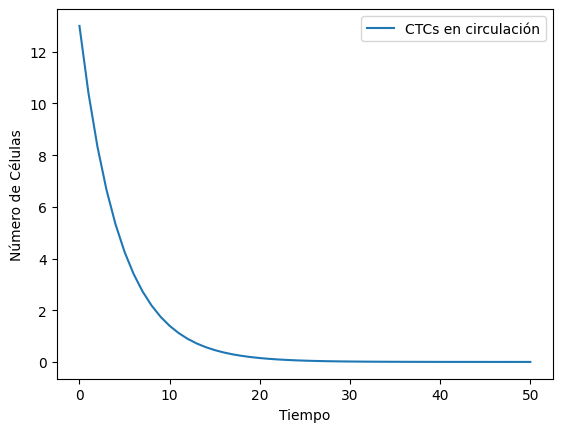

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo de circulación
num_CTCs = len(intravasated_cells)  # Empezamos con las células intravasadas
survival_rate = 0.8  # Probabilidad de sobrevivir en cada paso
steps = 50  # Número de pasos de circulación

# Simulación de circulación
CTCs = num_CTCs
CTC_history = [CTCs]
for _ in range(steps):
    CTCs *= survival_rate  # Reducción de células por depuración inmunitaria y cizallamiento
    CTC_history.append(CTCs)

# Visualización de la supervivencia de células circulantes
plt.plot(CTC_history, label="CTCs en circulación")
plt.xlabel("Tiempo")
plt.ylabel("Número de Células")
plt.legend()
plt.show()


## 4. Extravasación y Nicho Pre-Metastásico (Modelo de Reacción-Difusión + Enfoque de Interacciones)
El nicho pre-metastásico se crea por factores solubles liberados por el tumor primario. Aquí modelamos la extravasación y la preparación del nicho mediante un enfoque de difusión e interacción.

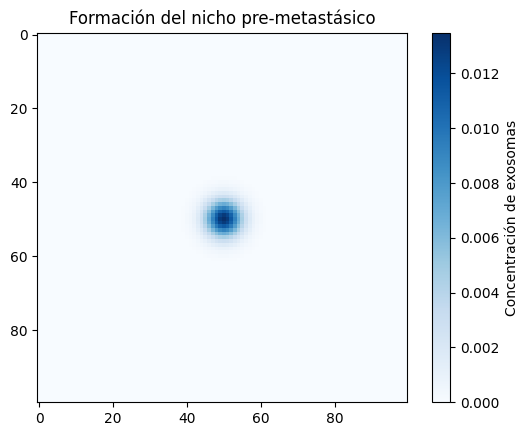

In [ ]:
# Parámetros
L = 100
D_exosome = 0.03  # Difusión de exosomas
pre_metastatic_factor = np.zeros((L, L))
pre_metastatic_factor[L//2, L//2] = 1  # Fuente de exosomas en el centro

# Simulación del nicho pre-metastásico
for _ in range(200):
    # Difusión de exosomas y factores solubles
    pre_metastatic_factor += D_exosome * (np.roll(pre_metastatic_factor, 1, axis=0) + np.roll(pre_metastatic_factor, -1, axis=0) +
                                          np.roll(pre_metastatic_factor, 1, axis=1) + np.roll(pre_metastatic_factor, -1, axis=1) - 4 * pre_metastatic_factor)

# Visualización del nicho pre-metastásico
plt.imshow(pre_metastatic_factor, cmap='Blues')
plt.colorbar(label='Concentración de exosomas')
plt.title('Formación del nicho pre-metastásico')
plt.show()


## 5. Micrometástasis y Colonización (Modelo de Crecimiento Poblacional con Angiogénesis)
Finalmente, las células extravasadas pueden colonizar el nicho creando micrometástasis y provocando angiogénesis para sustentar su crecimiento.

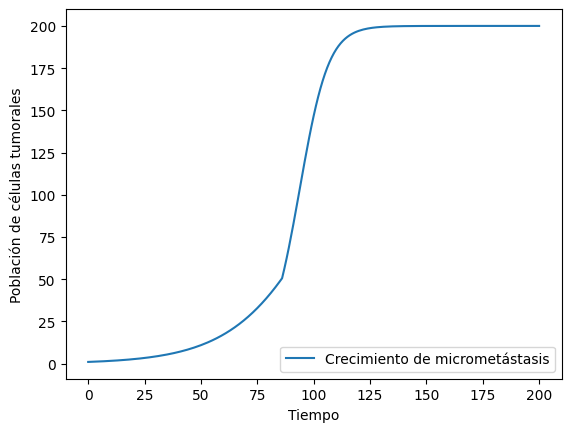

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
K = 200  # Capacidad de carga del nicho
r = 0.05  # Tasa de crecimiento inicial
angiogenesis_threshold = 50
extra_growth = 0.1  # Tasa adicional de crecimiento tras angiogénesis

# Simulación de micrometástasis con angiogénesis
populations = [1]  # Comienza con 1 célula tumoral
for _ in range(200):
    growth_rate = r + (extra_growth if populations[-1] > angiogenesis_threshold else 0)
    populations.append(populations[-1] + growth_rate * populations[-1] * (1 - populations[-1] / K))

# Visualización del crecimiento de micrometástasis
plt.plot(populations, label="Crecimiento de micrometástasis")
plt.xlabel("Tiempo")
plt.ylabel("Población de células tumorales")
plt.legend()
plt.show()
